In [2]:
using Knet

In [3]:
include("Network.jl")
include("Encoder.jl")
include("slim_reader.jl")

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at slim_reader.jl:6
└ @ Core /home/ec2-user/comp492/Text2Image-cemil-slim-dataset-reader/slim_reader.jl:6


Main.Slim_Reader

In [4]:
using Knet, ImageMagick, Colors, Images, Sloth, DRAW, Random
BATCH_SIZE = 50
EPOCH = 100
NUMBATCHES = 200000
slim_data_dir = "/home/ec2-user/efs/slim-dataset"

┌ Info: Recompiling stale cache file /home/ec2-user/.julia/compiled/v1.2/DRAW/AGNCk.ji for DRAW [7e16b5a0-e062-11e9-3467-b7e39d9ee233]
└ @ Base loading.jl:1240
┌ Warning: Package DRAW does not have Sloth in its dependencies:
│ - If you have DRAW checked out for development and have
│   added Sloth as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with DRAW
└ Loading Sloth into DRAW from project dependency, future warnings for DRAW are suppressed.


"/home/ec2-user/efs/slim-dataset"

In [5]:
function predict(n, captions, cameras)   #(n::Network, images, captions, cameras)
    r, unseen_ang = n.representationModel(captions, cameras)
    conditional_variable = vcat(r, unseen_ang)
    mu = KnetArray{Float32}(Knet.zeros(162,50))
    sigma = KnetArray{Float32}(Knet.ones(162,50))
    z = mu .+ randn!(similar(mu)) .* sigma
    decinput = reshape(vcat(z, conditional_variable), (1,1,450,50))
    rimages = n.generationModel.image_decoder(decinput)
    return rimages
end

predict (generic function with 1 method)

In [7]:
nt_test_files = Slim_Reader.get_test_filenames(slim_data_dir, false, true)
# Construct training dataset object for synthetic data
nt_test_data = Slim_Reader.make_dataset_object(nt_test_files, BATCH_SIZE)
nt_test_batch = Slim_Reader.get_next_batch(nt_test_data, KnetArray{Float32}, false, true);
tstimages, tstcaptions, tstcameras = getdata(nt_test_batch)
goldtstimages = creategoldimg(tstimages)




Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.



2019-12-22 09:53:20.965268: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2019-12-22 09:53:20.990005: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300070000 Hz
2019-12-22 09:53:20.990531: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x8938610 executing computations on platform Host. Devices:
2019-12-22 09:53:20.990556: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
OMP: Info #212: KMP_AFFINITY: decoding x2APIC ids.
OMP: Info #210: KMP_AFFINITY: Affinity capable, using global cpuid leaf 11 info
OMP: Info #154: KMP_AFFINITY: Initial OS proc set respected: 0-3
OMP: Info #156: KMP_AFFINITY: 4 available OS procs
OMP: Info #157: K

32×32×3×50 KnetArray{Float32,4}:
[:, :, 1, 1] =
 0.603922  0.603922  0.603922  0.603922  …  0.603922  0.603922  0.603922
 0.603922  0.603922  0.603922  0.603922     0.603922  0.603922  0.603922
 0.603922  0.603922  0.603922  0.603922     0.603922  0.603922  0.603922
 0.603922  0.603922  0.603922  0.603922     0.603922  0.603922  0.603922
 0.603922  0.603922  0.603922  0.603922     0.603922  0.603922  0.603922
 0.603922  0.603922  0.603922  0.603922  …  0.603922  0.603922  0.603922
 0.603922  0.603922  0.603922  0.603922     0.603922  0.603922  0.603922
 0.603922  0.607843  0.603922  0.603922     0.603922  0.603922  0.603922
 0.678431  0.67451   0.627451  0.631373     0.65098   0.670588  0.65098 
 0.380392  0.631373  0.65098   0.654902     0.607843  0.533333  0.462745
 0.419608  0.423529  0.411765  0.415686  …  0.596078  0.568627  0.572549
 0.427451  0.427451  0.415686  0.435294     0.592157  0.556863  0.54902 
 0.415686  0.423529  0.423529  0.396078     0.537255  0.564706  0.560784
 ⋮ 

In [17]:
net = Knet.load("trained_model_nt4.jld2", "results")

Network(RepresentationModel(CaptionEncoder(ConvModel(P(KnetArray{Float32,4}(1,30,64,32)), P(KnetArray{Float32,4}(1,2,32,1)), NNlib.relu), Corpus(Dict("edges," => 1672,"n/a" => 2653,",From" => 12584,"olive-green" => 8304,"side)," => 3434,"Back-center" => 11041,"rises" => 752,"fram" => 2029,"gathered" => 4636,"skinny," => 2149…), P(KnetArray{Float32,2}(64,12787)))), AngleEncoder(MultilayerPerceptron((Layer0(P(KnetArray{Float32,2}(32,2)), P(KnetArray{Float32,2}(32,500))),))), MultilayerPerceptron((Layer0(P(KnetArray{Float32,2}(128,96)), P(KnetArray{Float32,2}(128,500))), Layer0(P(KnetArray{Float32,2}(196,128)), P(KnetArray{Float32,2}(196,500))), Layer0(P(KnetArray{Float32,2}(256,196)), P(KnetArray{Float32,2}(256,500)))))), GenerationModel(ImageEncoder(Layer0(P(KnetArray{Float32,2}(1024,288)), P(KnetArray{Float32,2}(1024,50))), ImageConvModel(P(KnetArray{Float32,4}(17,17,4,1)), P(KnetArray{Float32,4}(16,16,1,1)), NNlib.relu), SamplingModel(Layer0(P(KnetArray{Float32,2}(162,256)), P(KnetArr

In [18]:
rimages = predict(net, tstcaptions, tstcameras)

32×32×3×50 KnetArray{Float32,4}:
[:, :, 1, 1] =
 0.0        0.0         0.0        …  0.28754    0.0247549  0.0363719
 0.0        0.0178091   0.0           0.0223127  0.0        0.0      
 0.286884   0.0         0.208766      0.0        0.184105   0.0688114
 0.0        0.0         0.0           0.277856   0.189552   0.203756 
 0.165678   0.035236    0.0239534     0.0        0.0        0.0968093
 0.138897   0.137048    0.238654   …  0.204585   0.331901   0.174478 
 0.0        0.0         0.0           0.0        0.31017    0.0      
 0.0874687  0.0404253   0.0           0.0950618  0.0876675  0.0      
 0.0        0.108216    0.183708      0.0455412  0.407598   0.0      
 0.0        0.0         0.0154081     0.0        0.0        0.0      
 0.0        0.0426832   0.0        …  0.373796   0.0        0.0      
 0.0431713  0.00987128  0.0           0.159769   0.268387   0.0      
 0.0363345  0.308857    0.0523365     0.0        0.0940787  0.0      
 ⋮                                 ⋱      

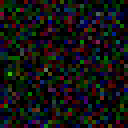

In [19]:
outimg = permutedims(rimages[:,:,:,40], (3,1,2))
colorview(RGB, Array(outimg))

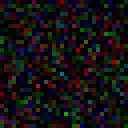

In [9]:
outimg = permutedims(rimages[:,:,:,40], (3,1,2))
colorview(RGB, Array(outimg))

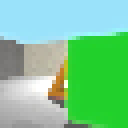

In [10]:
colorview(RGB, Array(permutedims(goldtstimages[:,:,:,10], (3,1,2))))